# Week 9 Overview

This week will be a mix of data vizualization problems and . 

The first 5 problems are data cleaning and the final 4 problems are linear algebra. 

### Data Visualization

Data visualization is a key part of exploratory data analysis (EDA), a crucial initial step for understanding a dataset and preparing for statistical modeling.

Helps visually answer questions such as:
- what patterns are evident in the data?
- what variables are important?
- does the data have anomalies or outliers?

Data visualization is also used throughout the data analysis process to show results and convey information to stakeholders.

Typically, EDA uses `histograms` & `box plots` to visualize `distribution` of a single continuous variable. `Bar charts` & `scatterplots` are used for `bivariate analysis` - correlation between two variables.


#### Histograms

![histograms](https://raw.githubusercontent.com/brendenwest/cis276/main/images/histograms.png)

Display the distribution of a continuous variable.
- Useful for visualizing the shape, for identifying
patterns or trends, for detecting
outliers, skewness, or multimodality
- Divides data into equal-width intervals (`bins`)
- Height of each `bar` represents frequency or
`count` of observations
- Can also compare the distribution of two
or more variables


#### Box & Whisker Plots

A box plot can show how tightly data is grouped, how the data is skewed, and also the symmetry of data.

![image](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-2.png)

Display `median`, `quartiles`, and outliers.
- Useful for visualizing the distribution and spread.
- Box represents `interquartile range` (IQR)
- Line inside the box represents the median
- Whiskers extend from box to minimum and maximum values within 1.5 times the IQR from the box
- Values outside of this range are considered outliers and plotted as individual points


#### Scatterplots

Scatter (aka X-Y) plots show the relationship between two continuous variables. Also useful for identifying outlier data points.

![scatterplots](https://www.mathsisfun.com/data/images/correlation-examples.svg)



#### Bar Charts

Useful for visualizing distribution of `categorical` variables through relative size of bars.

-  One axis represents categories being compared
- Other axis represents frequency, count, or percentage of each category
- usually has space between bars to avoid confusion with histograms

![bar_chart](https://www.mathsisfun.com/data/images/bar-chart-movies.svg)


### Plotting with matplotlib

matplotlib is python package designed for creating (mostly two-dimensional) publication-quality plots.

It allows interactive plotting from the iPython shell or within Jupyter notebooks

matplotlib can export visualizations to  common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

- plots & plot types
- title & labels
- legends
- subplots
- annotations
- saving plots

### Plotting with pandas

The pandas `plot()` method is a wrapper for matplotlib's pyplot.plot() and produces the same plots, but with simpler syntax for visualizing dataframes.
`.plot()` has several optional parameters. Most notably, the `kind` parameter  determines which kind of plot you’ll create (default is a `line` plot):

- "area" for area plots.
- "bar" for vertical bar charts.
- "barh" for horizontal bar charts.
- "box" for box plots.
- "hexbin" for hexbin plots.
- "hist" for histograms.
- "kde" for kernel density estimate charts.
- "density" an alias for "kde".
- "line" for line graphs.
- "pie" for pie charts.
- "scatter" for scatter plots.

### Plotting with seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn not only makes it easier than pandas to prepare a wider variety of plots, but supports enhancements for presentation-quality plots.

Seaborn supports several key types of plots:

- **relational** - show the relationship between two numeric variables. Includes scatter plots and line plots
- **categorical** - compare data in different categories
- **distribution** - examine how numeric data is distributed across a range of values. Types of distribution plots are histogram, kernel density estimate (KDE) plot, and empirical cumulative distribution function (ECDF) plot
- **predictive** - plots that are designed for predictive analysis, such as for linear regression models.

#### Seaborn styles

`set_style(style)`
Sets the background style with one of these values: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks` (the default). This style stays in effect until it is changed by another set_style() call.
#### General vs. specific methods

You can create Seaborn plots using the general `relplot()` command, which expects a `kind` parameter.

Alternatively, you can use a specific method - e.g. `lineplot()`, which does not require a `kind` parameter.

The two approaches mostly produce the same result, but the the general methods let you create plots with subplots, while the specific methods don’t.

So the general methods return a `FacetGrid` object that contains an `Axes` object for each subplot. The specific methods return an `Axes` object.

#### Basic Seaborn plot parameters

- data - the DataFrame of data to plot
- kind - the type of plot (general plots only)
- x, y - data columns for the x- and y-axis
- hue -  the column that determines categories to plot, with different color for each category
- palette -  color pallette for the plot
- height - The height of the plot in inches with a default of 5. (general plots only)
- aspect - the ratio of width to height (general plots only)
- legend - options for how the legend will be drawn: `auto` (the default), `brief`, `full`, and `False`. (general plots only)

#### Creating subplots

- By default, x and y labels are shared by subplots
- subplots get their title from the category label

#### Modifying plot features

The `Axes` object that provides methods for enhancing a plot.

#### Saving plots

Seaborn plots can be saved to PNG, SVG, or PDF files. The approach is slightly different for plots created with general or specific methods.

- **General method** - assign the plot's FacetGrid object to a variable and then use the `savefig()` method of the FacetGrid object
- **Specific method** - call the `get_figure()` method on the Axes object  returned by the lineplot() method, then chain go the `savefig()` method

# Data Visualization Problems

For the problems this week we are going to go a step deeper and start to ask questions about our data. 

In [27]:
import pandas as pd
import seaborn as sns

# Source: https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::disability-and-health-insurance-seattle-neighborhoods/about
dis_health_df = pd.read_csv('seattle_data/disability_health_insurance_Neighborhoods.csv')
dis_health_df.columns = [i.replace(" ", "_") for i in dis_health_df.columns]

# Source: https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::poverty-and-employment-status-seattle-neighborhoods/about
income_df = pd.read_csv('seattle_data/incomes_Neighborhoods.csv')
income_df.columns = [i.replace(" ", "_") for i in income_df.columns]

# Source: https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::incomes-occupations-and-earnings-seattle-neighborhoods/about
poverty_df = pd.read_csv('seattle_data/poverty_Neighborhoods.csv')
poverty_df.columns = [i.replace(" ", "_") for i in poverty_df.columns]

## Problem 1: Asking Questions (10 pts)

Take 5 minutes to look through the above data sources as pose 5 analytical questions you might want to ask with that data. By analytical I mean question will drive informative analysis. For example:

**Good Question**: Is there relationship between health insurance coverage and disability?

**Bad Question**: How many neighboorhoods are there?

The second question is the type of question that is is good to ask when processing the data to make sure you processed it correctly but it doesn't give you insights into the data.

At least two of the questions must involve data from at least two of the datasets.

In class you will share your questions with your group and as a group you will pick two questions to focus on for analysis in class. On your own this week you will answer the rest of your questions.

**Grading**
You will receive 2 points per question. One point for forming a question the other for it being a analytical question. 

1. What is the relationship between the number of households and the aggregate household income?
2. Why does the population without insurance metric match up so closely with the population under 19 years in the High Point neighborhood?
3. Is there a relationship between the Population 65 years and over with health insurance metric and household income?
4. How does the population 18 to 64 years below poverty without a disability compare to the population 18 to 64 years without health insurance?
5. What is the relationship between the neighborhood type and the aggregate household income?

In [28]:

print(income_df.head())
#print(income_df.info())
#print(income_df.describe())

print(dis_health_df.head())
#print(dis_health_df.info())
#print(dis_health_df.describe())

print(poverty_df.head())
#print(poverty_df.info())
#print(poverty_df.describe())

   OBJECTID  NEIGH_NO   Neighborhood_Name Neighborhood_Type  \
0         1       1.0  Council District 1                CD   
1         2       2.0  Council District 2                CD   
2         3       3.0  Council District 3                CD   
3         4       4.0  Council District 4                CD   
4         5       5.0  Council District 5                CD   

  Neighborhood_Subtype ACS_Vinatage  \
0                  NaN         5Y23   
1                  NaN         5Y23   
2                  NaN         5Y23   
3                  NaN         5Y23   
4                  NaN         5Y23   

   Aggregate_income_in_the_past_12_months_(in_2022_inflation-adjusted_dollars)  \
0                                         7965084000                             
1                                         6355394800                             
2                                        10763937200                             
3                                         7692298500      

## Problem 2: Data Cleaning and Merging (10 pts)

Take a few minutes to prepare your data for analysis. You can decide what preparation is required but you must at least perform two of the following to receive credit. You might find that you start to create a graph and then need to prepare the data better (i.e. remove an outlier) that is expected.

1. Clean up the column names.
2. Merge dataframes together. 
3. Fill in null values.
4. Removing outliers. 
5. Change the shape of the data (We will learn aggregations next week but if you know how feel free to use them).
6. Any other preparation required to answer your questions.

For each preparation step add a comment to explain why you did that step. 

**Grading** You will receive 5 points for the first two data prep steps you perform. 2 point will be for the comment and then 3 points will be for accurately performing the prep. 

In [34]:
import numpy as np

# Step 1: Clean Column Names (Standardize naming convention)
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)
    return df

dis_health_df = clean_column_names(dis_health_df)
income_df = clean_column_names(income_df)
poverty_df = clean_column_names(poverty_df)

# Step 2: Merge DataFrames on 'neighborhood_name'
merged_df = dis_health_df.merge(income_df, on='neighborhood_name', how='inner')
merged_df = merged_df.merge(poverty_df, on='neighborhood_name', how='inner')

# Step 3: Handle Missing Values (Fill with median for numeric columns)
numeric_cols = merged_df.select_dtypes(include=['number']).columns 
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].median())

# Step 4: Remove Outliers - Only for numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns 
Q1 = merged_df[numeric_cols].quantile(0.25)
Q3 = merged_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a mask for valid data
mask = ~((merged_df[numeric_cols] < (Q1 - 1.5 * IQR)) | (merged_df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to filter numeric columns only, while keeping the full df structure
filtered_df = merged_df[mask].reset_index(drop=True)

print(filtered_df.head())

   objectid_x  neigh_no_x neighborhood_name neighborhood_type_x  \
0           1         1.4      Alki/Admiral                 CRA   
1           2         2.1    North Delridge                 CRA   
2           4         2.3         Riverview                 CRA   
3           5         2.4  Roxhill/Westwood                 CRA   
4           6         2.5     Highland Park                 CRA   

   neighborhood_subtype_x acs_vinatage_x  population_18_years_and_over  \
0               Southwest           5Y23                         10131   
1  Delridge Neighborhoods           5Y23                          5213   
2  Delridge Neighborhoods           5Y23                          3940   
3  Delridge Neighborhoods           5Y23                         11602   
4  Delridge Neighborhoods           5Y23                          6641   

   population_18_to_64_years  \
0                       7910   
1                       4629   
2                       3497   
3                      1

## Problem 3: Question 1 (12 pts)

You will prepare a visualization for the question you asked by completing the following steps: 

1. Add a mark down cell writing out your question and your findings.
2. Create a visual two answer the question. Perform at least 2 modifications of the graph to empathise what you found in the data (https://www.youtube.com/watch?v=IM-r9lEZciM). You must add a comment to your code explain the modifications you made. For example:
    * Add a decriptive title
    * Modify the color(s) in your graph
    * Pick a accurate scale to communicate your findings without skewing the data. (Watch https://www.youtube.com/watch?v=9pNWVMxaFuM)



**Grading** 

You will receive 3 points for the mark down cell writing out your questions and findings. 

You will receive 3 points for picking the correct visualization for your question and data. 

For each graph modification you will get 2 points for correctly coding the modification and 1 point for the comment explaining why you picked that modification.  

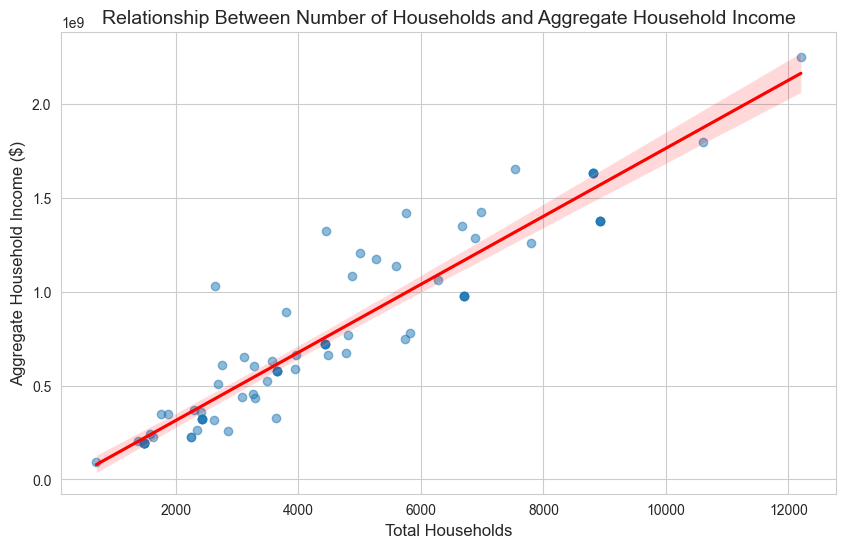

In [30]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=filtered_df,
    x="total_households",
    y="aggregate_household_income",
    #Keyword arguments = "kws"
    scatter_kws={"alpha": 0.5},  # Transparency for better visibility
    line_kws={"color": "red"}    # Regression line color
)

plt.xlabel("Total Households", fontsize=12)
plt.ylabel("Aggregate Household Income ($)", fontsize=12)
plt.title("Relationship Between Number of Households and Aggregate Household Income", fontsize=14)

plt.show()


What is the relationship between the number of fhouseholds, and the aggregate household income?

According do the scatter plot, the regression line shows that the relationship between the total number of households and the aggregate household income is linear, with the aggregate household income increasing along with the total number of households in a given neighborhood. 

## Problem 4: Question 2 (12 pts)

You will prepare a visualization for the question you asked by completing the following steps: 

1. Add a mark down cell writing out your question and your findings.
2. Create a visual two answer the question. Perform at least 2 modifications of the graph to empathise what you found in the data (https://www.youtube.com/watch?v=IM-r9lEZciM). You must add a comment to your code explain the modifications you made. For example:
    * Add a decriptive title
    * Modify the color(s) in your graph
    * Pick a accurate scale to communicate your findings without skewing the data. (Watch https://www.youtube.com/watch?v=9pNWVMxaFuM)



**Grading** 

You will receive 3 points for the mark down cell writing out your questions and findings. 

You will receive 3 points for picking the correct visualization for your question and data. 

For each graph modification you will get 2 points for correctly coding the modification and 1 point for the comment explaining why you picked that modification.  

<Figure size 800x500 with 0 Axes>

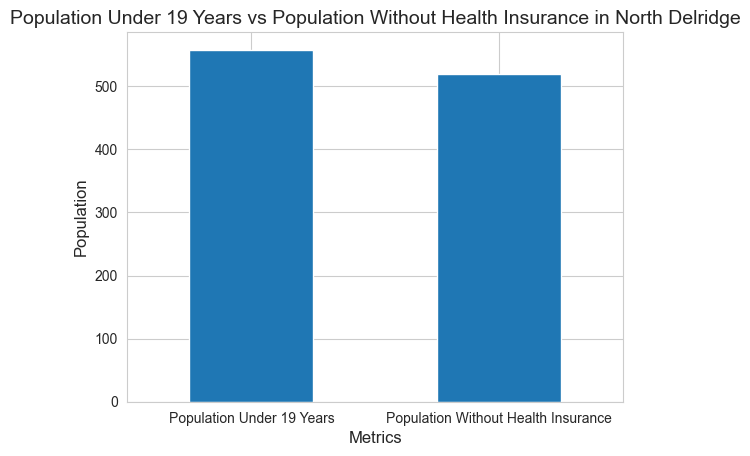

In [31]:
import plotly.express as px

# Filter data for North Delridge neighborhood using dis_health_df
high_point_df = dis_health_df[dis_health_df['neighborhood_name'] == 'North Delridge']

# Set plot style
sns.set_style("whitegrid")

# Create a bar plot comparing 'population_under_19_years' and 'population_without_health_insurance'
plt.figure(figsize=(8, 5))

# Create a bar plot with two bars for North Delridge neighborhood
high_point_df[['population_under_19_years', 'population_without_health_insurance']].T.plot(kind='bar', legend=False)

# Labels and title
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.title("Population Under 19 Years vs Population Without Health Insurance in North Delridge", fontsize=14)

# Show the plot
plt.xticks([0, 1], ['Population Under 19 Years', 'Population Without Health Insurance'], rotation=0)
plt.show()


# Reshape the data for easier plotting
bar_data = dis_health_df[['neighborhood_name', 'population_under_19_years', 'population_without_health_insurance']]
bar_data = bar_data.melt(id_vars='neighborhood_name', value_vars=['population_under_19_years', 'population_without_health_insurance'], var_name='Metric', value_name='Population')

# Create a horizontal bar plot with a log scale
fig = px.bar(
    bar_data, 
    y='neighborhood_name',  # Neighborhoods on the y-axis
    x='Population',         # Population values on the x-axis
    color='Metric',
    labels={'neighborhood_name': 'Neighborhood', 'Population': 'Population'},
    title="Comparison of Population Under 19 Years vs Population Without Health Insurance Across Neighborhoods",
    orientation='h'  # 'h' makes the bars horizontal
)

# Apply log scale to x-axis instead (since bars are now horizontal)
fig.update_layout(
    xaxis_type="log",  # Logarithmic scale applied to x-axis
    xaxis_title="Population (Log Scale)",
    yaxis_title="Neighborhood",
    autosize=True
)

# Show the plot
fig.show()

Why does the population without health insurance metric match up so closely with the population under 19 years in the High Point neighborhood?(Also Plotly experiment, surprisingly useful and easy)

    It turns out that it's very diffucult to answer this question, so it may not be a very good one. Based on graph 1, it can be observed that there's an abnormally high number of people without health insurance in North Delridge compared to the population, and this initially stood out. 
    
    The only other comparable town is Duwamish, where the population under 19 and population without health insurance appears in a similar proportion. This is visible on graph 2(after some zooming and scrolling. Simply hover the cursor over the bar to see information related to each city for these two metrics). 

    It's difficult to draw any conslusion regarding this question based on this information, and the autoscaled chart makes it clear that there is an average proportion of each total combined population for each metric in each district that represents the number of people living without health insurance. 

    This new information leads me to the conclusion that I should refrain from making any assumptions at this stage, and reconsider the nature of my question before I proceed any further. 




## Problem 5: Question 3 (12 pts)

You will prepare a visualization for the question you asked by completing the following steps: 

1. Add a mark down cell writing out your question and your findings.
2. Create a visual two answer the question. Perform at least 2 modifications of the graph to empathise what you found in the data (https://www.youtube.com/watch?v=IM-r9lEZciM). You must add a comment to your code explain the modifications you made. For example:
    * Add a decriptive title
    * Modify the color(s) in your graph
    * Pick a accurate scale to communicate your findings without skewing the data. (Watch https://www.youtube.com/watch?v=9pNWVMxaFuM)



**Grading** 

You will receive 3 points for the mark down cell writing out your questions and findings. 

You will receive 3 points for picking the correct visualization for your question and data. 

For each graph modification you will get 2 points for correctly coding the modification and 1 point for the comment explaining why you picked that modification.  

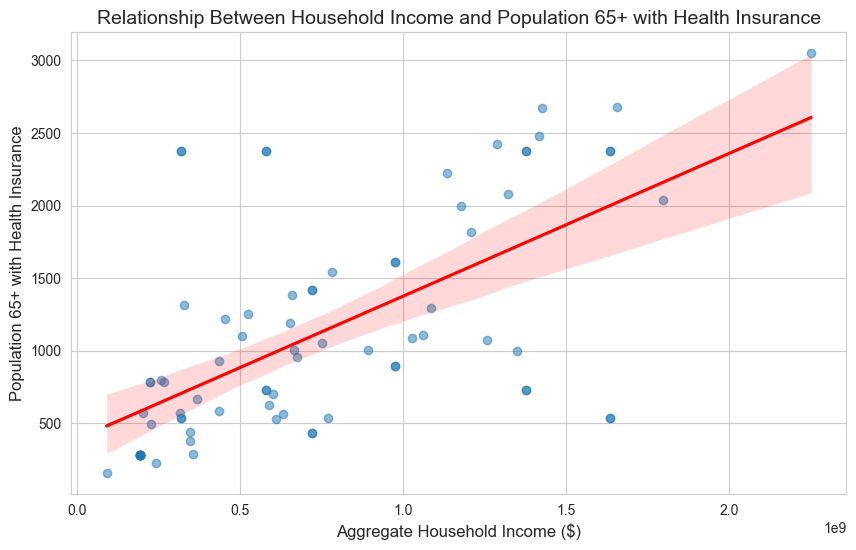

R² Score: 0.2587


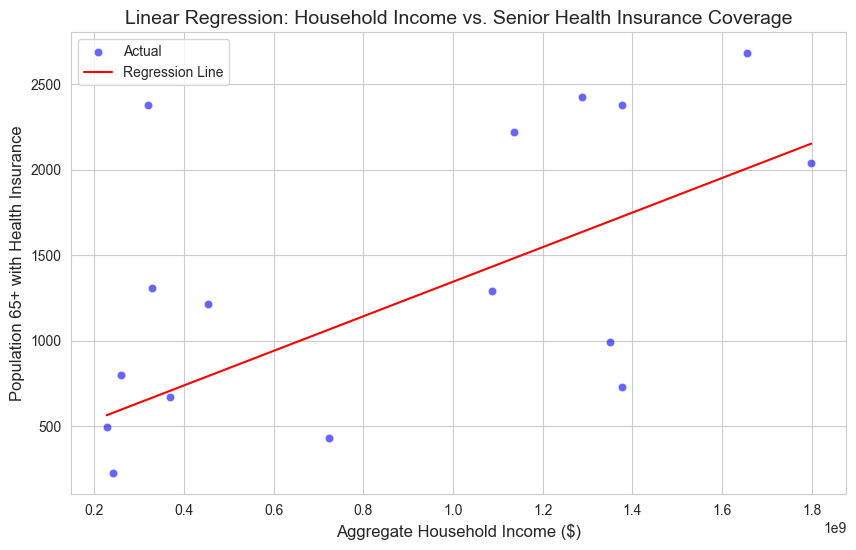

Pearson Correlation Coefficient:
                                                    aggregate_household_income  \
aggregate_household_income                                            1.000000   
population_65_years_and_over_with_health_insurance                    0.638722   

                                                    population_65_years_and_over_with_health_insurance  
aggregate_household_income                                                                   0.638722   
population_65_years_and_over_with_health_insurance                                           1.000000   


In [32]:
# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=filtered_df,
    x="aggregate_household_income",  
    y="population_65_years_and_over_with_health_insurance",  
    scatter_kws={"alpha": 0.5},  # Transparency for better visibility
    line_kws={"color": "red"}    # Regression line color
)

# Labels and title
plt.xlabel("Aggregate Household Income ($)", fontsize=12)
plt.ylabel("Population 65+ with Health Insurance", fontsize=12)
plt.title("Relationship Between Household Income and Population 65+ with Health Insurance", fontsize=14)

# Show the plot
plt.show()

#Linear Regression Model with sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = filtered_df[['aggregate_household_income']]  # Predictor (independent variable)
y = filtered_df['population_65_years_and_over_with_health_insurance']  # Target (dependent variable)

# Step 2: Split into training & testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)  # R² score measures how well the model fits the data
print(f"R² Score: {r2:.4f}")  # Closer to 1 means a better fit

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['aggregate_household_income'], y=y_test, color="blue", alpha=0.6, label="Actual")
sns.lineplot(x=X_test['aggregate_household_income'], y=y_pred, color="red", label="Regression Line")

plt.xlabel("Aggregate Household Income ($)", fontsize=12)
plt.ylabel("Population 65+ with Health Insurance", fontsize=12)
plt.title("Linear Regression: Household Income vs. Senior Health Insurance Coverage", fontsize=14)
plt.legend()
plt.show()

#Statistical Analysis

# Compute Pearson correlation
correlation = filtered_df[['aggregate_household_income', 'population_65_years_and_over_with_health_insurance']].corr(method='pearson')
print("Pearson Correlation Coefficient:")
print(correlation)

Is there a relationship between the Population 65 years and over with health insurance metric and household income?

    According to graph 1, the regression line shows a positive correlation between population over 65 with health insurance and household income, making it appear as though neighborhoods in more income are also more likely to host seniors with health insurance. 

    The results of the tests run to find the Pearson correlation coefficient for these two metrics indicates a moderate correlation. 

    Graph two, showing the results of a ilnear regression model using these metrics constructed using sklearn, shows an almost identical regression line to graph 1, further affirming the idea that there may be soem correlation betwen these two metrics. However, the R^2 score of 0.2587 indicates that aggregate household income accounts for about 25% of the variance in the senior population with health insurance, which isn't a great score to indicate correlation, and seems to suggest that there are other factors playing a role in determining how many seniors have health insurance. 

## Problem 6: Question 4 (12 pts)

You will prepare a visualization for the question you asked by completing the following steps: 

1. Add a mark down cell writing out your question and your findings.
2. Create a visual two answer the question. Perform at least 2 modifications of the graph to empathise what you found in the data (https://www.youtube.com/watch?v=IM-r9lEZciM). You must add a comment to your code explain the modifications you made. For example:
    * Add a decriptive title
    * Modify the color(s) in your graph
    * Pick a accurate scale to communicate your findings without skewing the data. (Watch https://www.youtube.com/watch?v=9pNWVMxaFuM)



**Grading** 

You will receive 3 points for the mark down cell writing out your questions and findings. 

You will receive 3 points for picking the correct visualization for your question and data. 

For each graph modification you will get 2 points for correctly coding the modification and 1 point for the comment explaining why you picked that modification.  

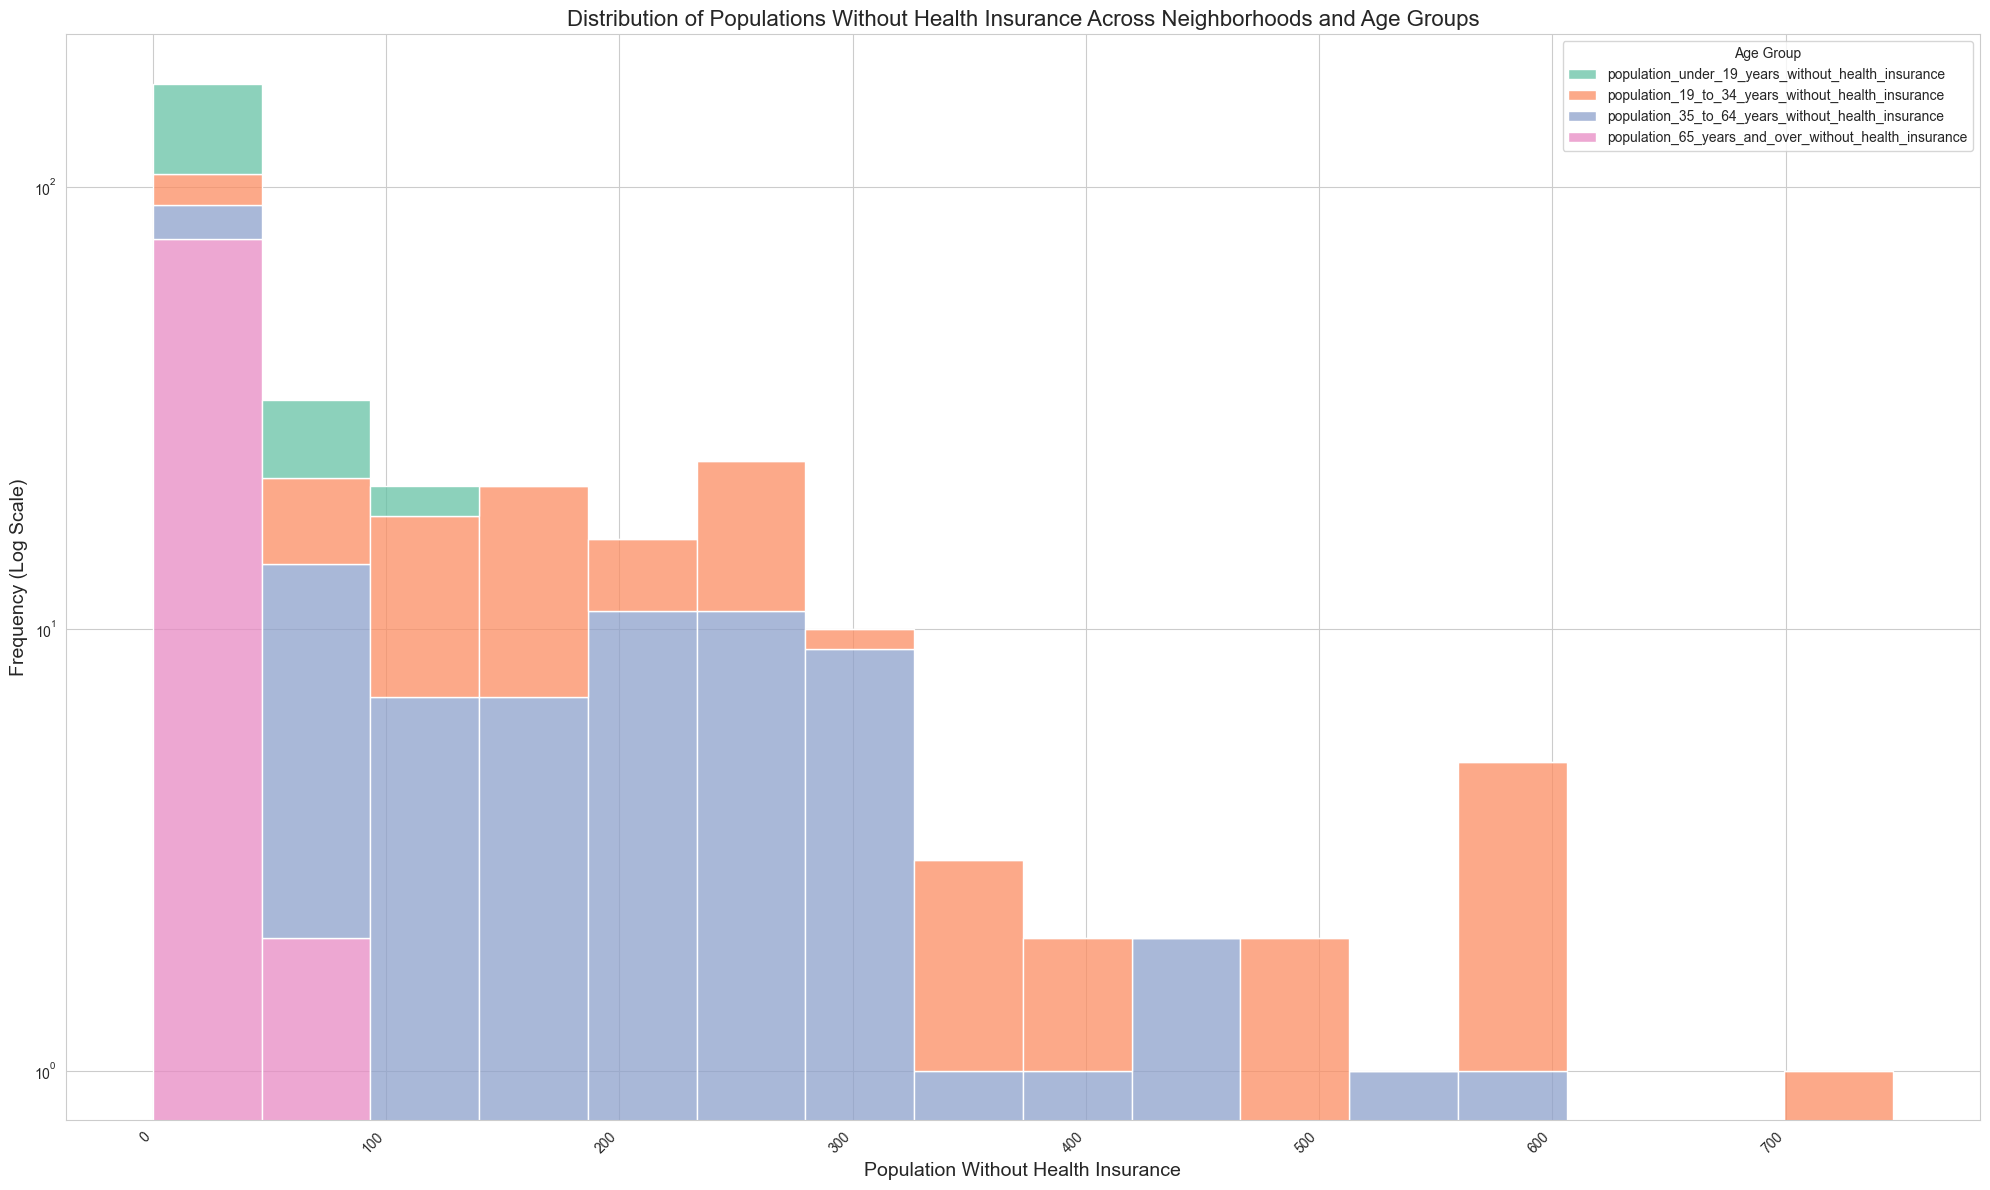

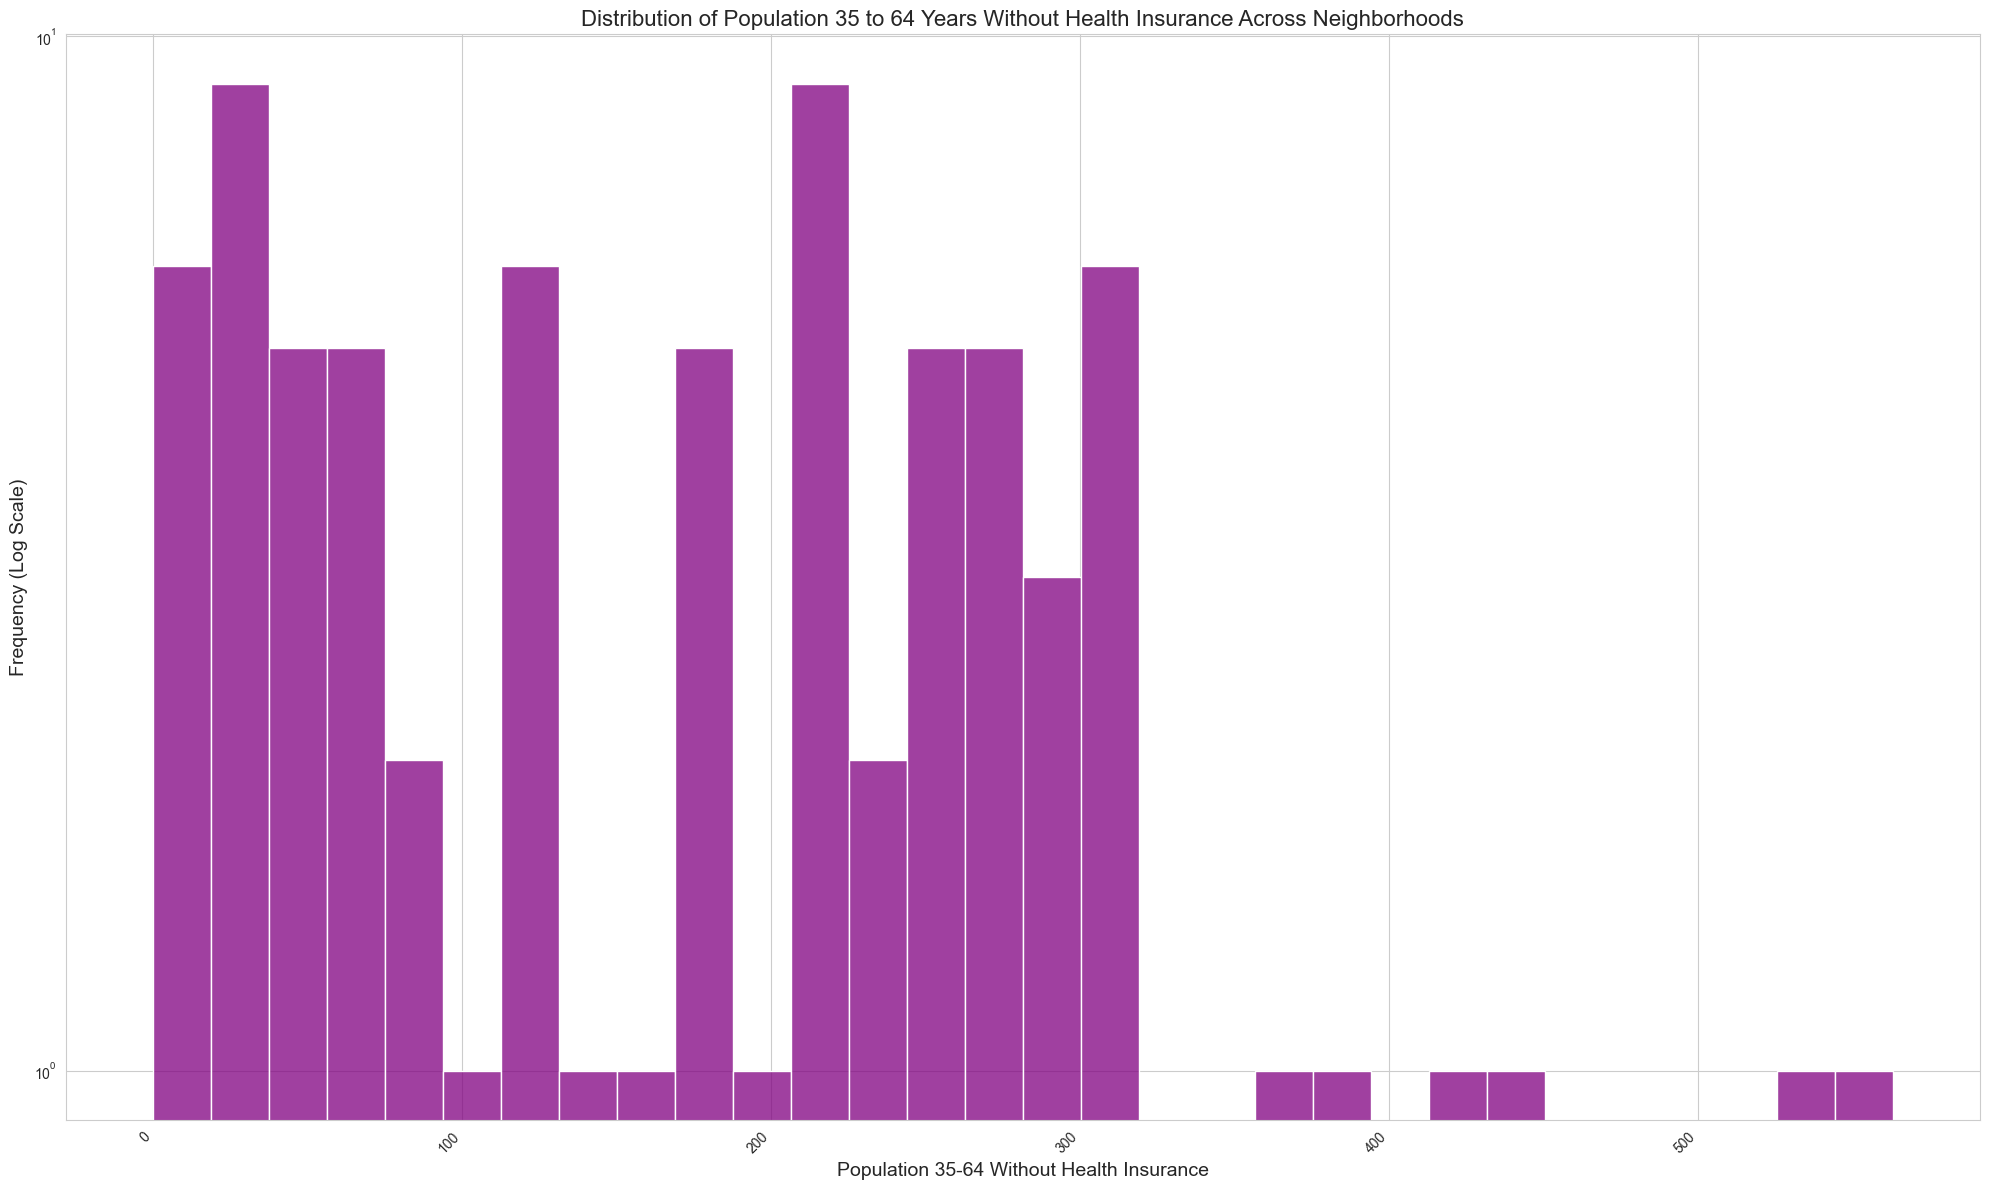

In [ ]:
# Graph One
columns = ['neighborhood_name', 
           'population_under_19_years_without_health_insurance', 
           'population_19_to_34_years_without_health_insurance', 
           'population_35_to_64_years_without_health_insurance', 
           'population_65_years_and_over_without_health_insurance']

df_for_plotting = filtered_df[columns]

# Reshape the data with melt()
df_melted = df_for_plotting.melt(id_vars='neighborhood_name', 
                                 value_vars=['population_under_19_years_without_health_insurance', 
                                             'population_19_to_34_years_without_health_insurance', 
                                             'population_35_to_64_years_without_health_insurance', 
                                             'population_65_years_and_over_without_health_insurance'],
                                 var_name='Age Group', value_name='Population Without Health Insurance')

plt.figure(figsize=(20, 12))  
sns.histplot(data=df_melted, x='Population Without Health Insurance', hue='Age Group', multiple='stack', palette='Set2', kde=False)

# Apply log scale to the y-axis for better data inclusion
plt.yscale('log')

plt.title('Distribution of Populations Without Health Insurance Across Neighborhoods and Age Groups', fontsize=16)
plt.xlabel('Population Without Health Insurance', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Graph Two
columns = ['neighborhood_name', 'population_35_to_64_years_without_health_insurance']
df_for_plotting = filtered_df[columns]

plt.figure(figsize=(20, 12))  # Large figure for readability
sns.histplot(data=df_for_plotting, x='population_35_to_64_years_without_health_insurance', bins=30, kde=False, color='purple')

# Apply log scale to the y-axis
plt.yscale('log')

plt.title('Distribution of Population 35 to 64 Years Without Health Insurance Across Neighborhoods', fontsize=16)
plt.xlabel('Population 35-64 Without Health Insurance', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

How does the population 18 to 64 years below poverty without a disability compare to the population 18 to 64 years without health insurance?

    By using the results from graph 1 from and 2, we can compare the population 18-64 years below poverty without a disability and the population 19-64 without health insurance to see if there appears to be some overlap in the population. While graph 1 shows a long tail distribution, where the majority of the senior population is shown to have healthcare since they are the most common demographic that measures closest to zero occurences, graph 2 seems to show a more random distribution of of the population from 18 to 65 without health insurance across neighborhoods. 

    Based on the difference in how the information presents on each graph, the distrubution is different enough that there is no apparent connection between these two demograohics. So, if one exists, the way that this series of vizualizations is designed does not make a connection immediately apparent. 

## Problem 7: Question 5 (12 pts)

You will prepare a visualization for the question you asked by completing the following steps: 

1. Add a mark down cell writing out your question and your findings.
2. Create a visual two answer the question. Perform at least 2 modifications of the graph to empathise what you found in the data (https://www.youtube.com/watch?v=IM-r9lEZciM). You must add a comment to your code explain the modifications you made. For example:
    * Add a decriptive title
    * Modify the color(s) in your graph
    * Pick a accurate scale to communicate your findings without skewing the data. (Watch https://www.youtube.com/watch?v=9pNWVMxaFuM)



**Grading** 

You will receive 3 points for the mark down cell writing out your questions and findings. 

You will receive 3 points for picking the correct visualization for your question and data. 

For each graph modification you will get 2 points for correctly coding the modification and 1 point for the comment explaining why you picked that modification.  

C:\Users\flori\AppData\Local\Temp\ipykernel_20448\1277218657.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




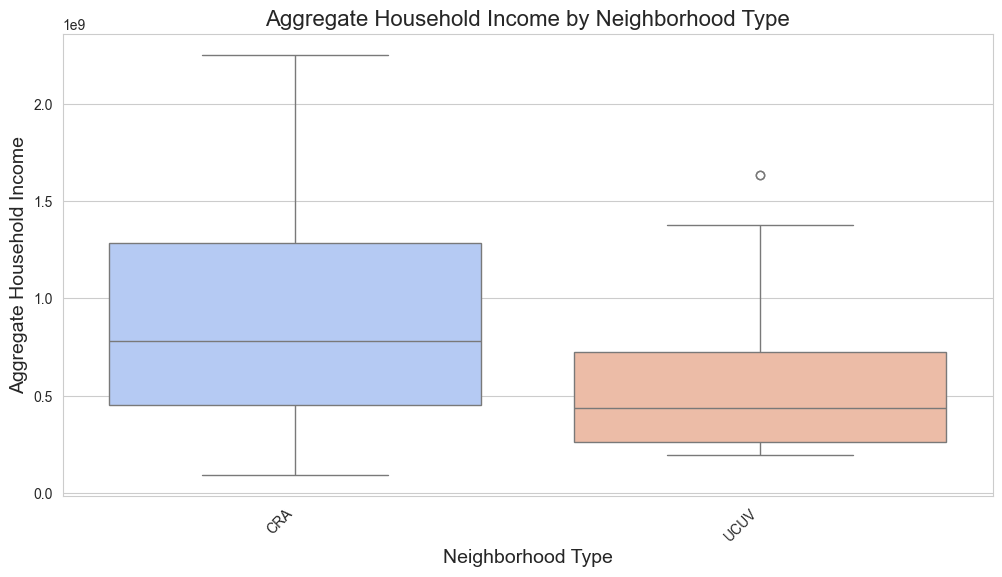

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="neighborhood_type_x", y="aggregate_household_income", palette="coolwarm")

plt.title("Aggregate Household Income by Neighborhood Type", fontsize=16)
plt.xlabel("Neighborhood Type", fontsize=14)
plt.ylabel("Aggregate Household Income", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

What is the relationship between the neighborhood type and the aggregate household income?

    According to the graph above, the CRA neighborhoods had a consistently higher median income, which is an indication that these neighborhoods are wealthier overall than those that fall under the UCUV category. The range of most of the data is also significantly larger in the CRA neighborhoods than in the UCUV neighborhoods, showing much greater economic desparity despite a higher average income overall. 

    The reduced range of the data from the UCUV neighborhoods shows that incomes are lower, but with less economic desparity, except for one neighborhood in particular, which shows en extremely high income that doesn't fit the general trend for the neighborhoods under this category. 

## Problem 8 (10pts)
Pick 5 columns in the datasets above and create a covariance by completing the following steps:

1. Mean center all columns. You can use panda's mean function for this. 
2. Create a covariance matrix as follows:
$$ C = X^T X \dfrac{1}{n-1}$$
3. You should save this to a dateframe called `cov_df` to be used in the next problem. 
4. Output the results of `cov_df` and visually check your results against [DataFrame.cov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html). The numbers should match. 

In [49]:
selected_columns = [
    'aggregate_household_income',
    'population_18_years_and_over',
    'population_65_years_and_over_with_health_insurance',
    'population_18_to_64_years_below_poverty_without_a_disability',
    'population_20_to_64_years_unemployed'
]

df_subset = filtered_df[selected_columns]
df_mean_centered = df_subset - df_subset.mean()
n = len(df_mean_centered)
cov_matrix = (df_mean_centered.T @ df_mean_centered) / (n - 1)
cov_df = pd.DataFrame(cov_matrix, index=selected_columns, columns=selected_columns)

print("Computed Covariance Matrix:")
print(cov_df)

print("\nPandas Covariance Matrix:")
print(df_subset.cov())

Computed Covariance Matrix:
                                                    aggregate_household_income  \
aggregate_household_income                                        2.489785e+17   
population_18_years_and_over                                      1.599350e+12   
population_65_years_and_over_with_health_insurance                2.452853e+11   
population_18_to_64_years_below_poverty_without...                5.387867e+10   
population_20_to_64_years_unemployed                              2.814347e+10   

                                                    population_18_years_and_over  \
aggregate_household_income                                          1.599350e+12   
population_18_years_and_over                                        2.660384e+07   
population_65_years_and_over_with_health_insurance                  3.341935e+06   
population_18_to_64_years_below_poverty_without...                  1.069606e+06   
population_20_to_64_years_unemployed                       

## Problem 9 (10pts)

Next you will take the `cov_df` and create a correlation matrix from it. The formula for this is

$$ R = SCS $$

Where $C$ is the covariance matrix `cov_df`, and $S$ is a diagonal matrix of reciprocated standard deviations per variable (that is, the ith diagonal is $\dfrac{1}{\sigma_i}$ where $\sigma_i$ is the standard deviation of variable i). You can use panda's standard deviation function to create $S$. 

Once you have created the correlation matrix visually compare it to [np.corrcoef](https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html)

In [50]:
std_devs = df_subset.std()
S = np.diag(1 / std_devs)
correlation_matrix = S @ cov_df.values @ S

cor_df = pd.DataFrame(correlation_matrix, index=selected_columns, columns=selected_columns)

print("Computed Correlation Matrix:")
print(cor_df)

print("\nNumPy Correlation Matrix:")
print(np.corrcoef(df_subset.T))

Computed Correlation Matrix:
                                                    aggregate_household_income  \
aggregate_household_income                                            1.000000   
population_18_years_and_over                                          0.621427   
population_65_years_and_over_with_health_insurance                    0.638722   
population_18_to_64_years_below_poverty_without...                    0.406000   
population_20_to_64_years_unemployed                                  0.366215   

                                                    population_18_years_and_over  \
aggregate_household_income                                              0.621427   
population_18_years_and_over                                            1.000000   
population_65_years_and_over_with_health_insurance                      0.841874   
population_18_to_64_years_below_poverty_without...                      0.779725   
population_20_to_64_years_unemployed                      